In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
data = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
print(data['Resume'][1])

Education Details 
May 2013 to May 2017 B.E   UIT-RGPV
Data Scientist 

Data Scientist - Matelabs
Skill Details 
Python- Exprience - Less than 1 year months
Statsmodels- Exprience - 12 months
AWS- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Sklearn- Exprience - Less than 1 year months
Scipy- Exprience - Less than 1 year months
Keras- Exprience - Less than 1 year monthsCompany Details 
company - Matelabs
description - ML Platform for business professionals, dummies and enthusiasts.
60/A Koramangala 5th block,
Achievements/Tasks behind sukh sagar, Bengaluru,
India                               Developed and deployed auto preprocessing steps of machine learning mainly missing value
treatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.
Deployed automated classification and regression model.
linkedin.com/in/aditya-rathore-
b4600b146                           Reasearch and deployed the time series foreca

In [5]:
X = data['Resume']
y  =data['Category']

<Axes: xlabel='count', ylabel='Category'>

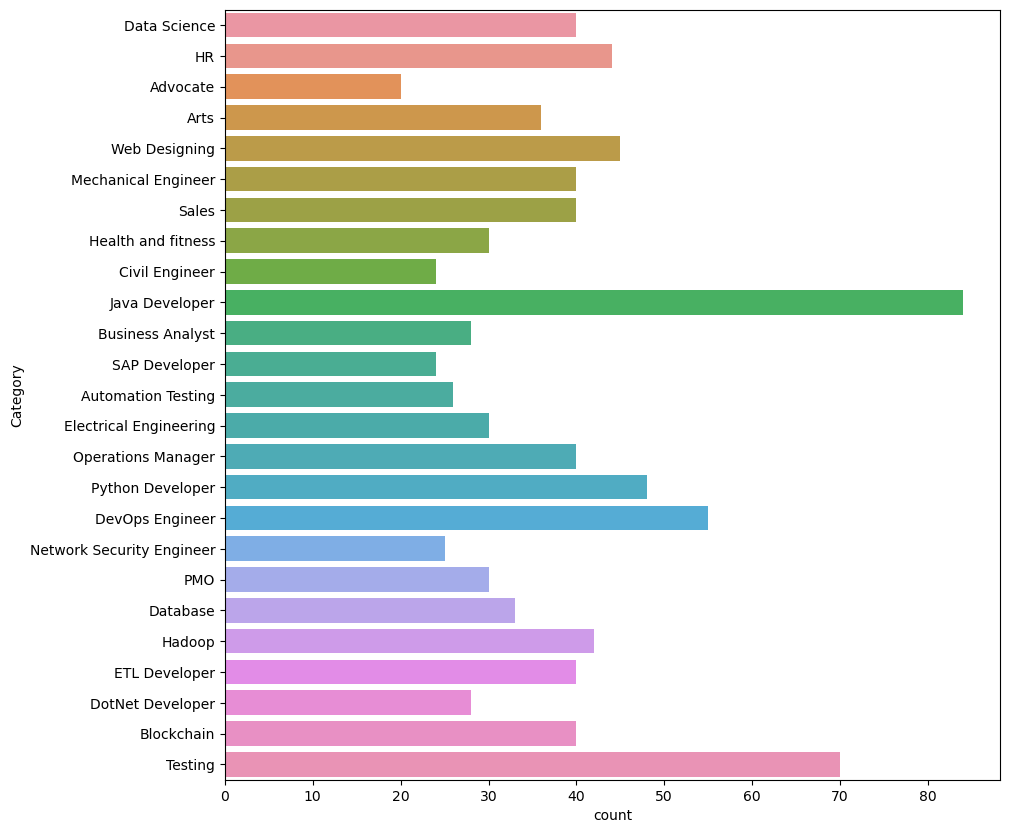

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(y=y)

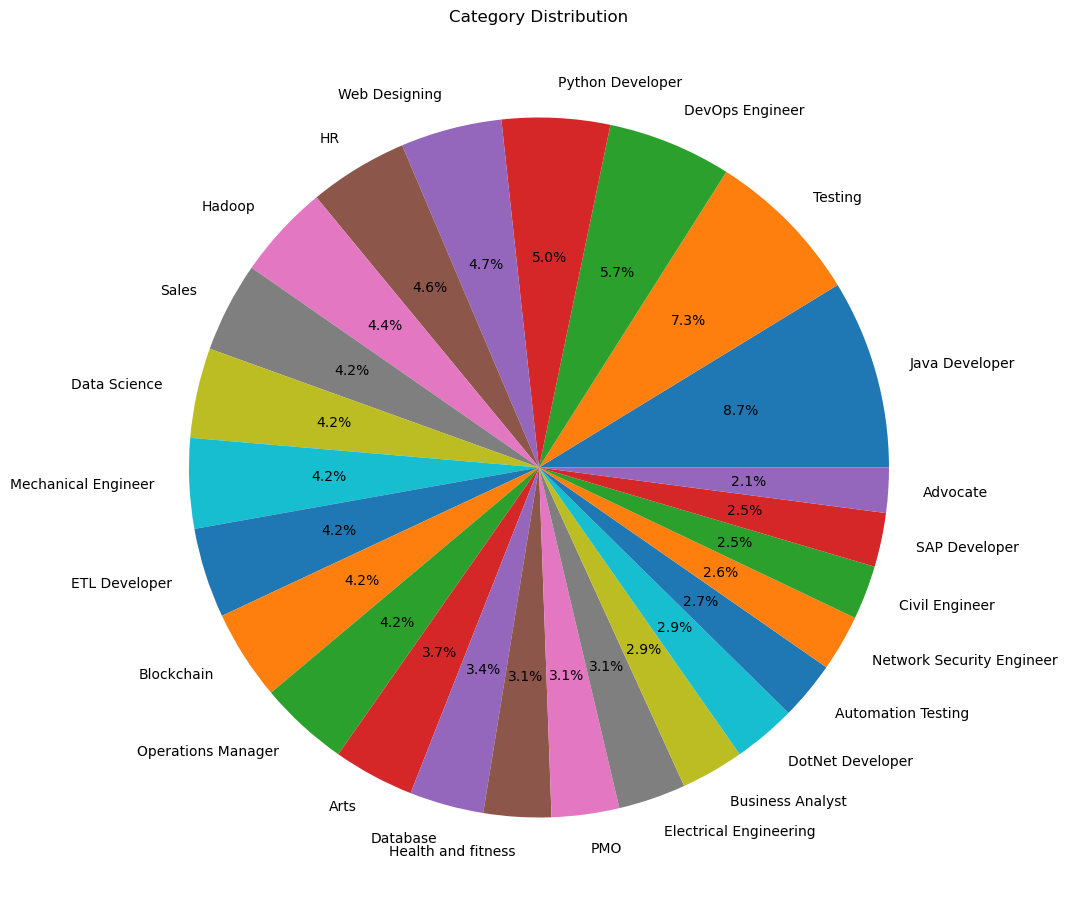

In [7]:
from matplotlib.gridspec import GridSpec

targetCounts = data['Category'].value_counts()
targetLabels = data['Category'].value_counts().index

# Make Square figure and axes
plt.figure(1,figsize=(25,25))
the_grid = GridSpec(2,2)

plt.subplot(the_grid[0,1],aspect =1,title = 'Category Distribution')
plt.pie(targetCounts,labels = targetLabels,autopct='%1.1f%%',shadow=False)
plt.show()

In [8]:
### Creating a Resume to Clean the Resume Data using regex method

In [9]:
def cleanResume(Text):
    Text = re.sub('https\S+\s*',' ',Text)
    Text = re.sub('RT|cc',' ',Text)
    Text = re.sub('#\S+',' ',Text)
    Text = re.sub('@\S+',' ',Text)
    Text = re.sub('[%s]'% 
                  re.escape("""!"#&%'()*+,:-./<=>?@[\]^_`{|}~"""),' ', Text)
    
    #remove punctuations
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text)
    Text = re.sub('\s+',' ',Text)
    
    #Remove Extra White Spaces
    return Text
   

In [10]:
cleanResume(data['Resume'][17])

'Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal E Mail bhawana chd Phone 09876971076 VVersatile high energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing end to end development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowled

##### installing WordCloud Lib
```!pip install wordcloud```

In [11]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [12]:
sword = stopwords.words('english')
totalWords = []
Sentences = data['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences+=cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word.lower() not in sword:
            totalWords.append(word)

In [13]:
len(totalWords)

33422

In [14]:
wordfreqdist = nltk.FreqDist(totalWords)
mostcomman = wordfreqdist.most_common(50)
print(mostcomman)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('Education', 142), ('College', 140), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72), ('Used', 72), ('Skills', 70), ('2', 70)]


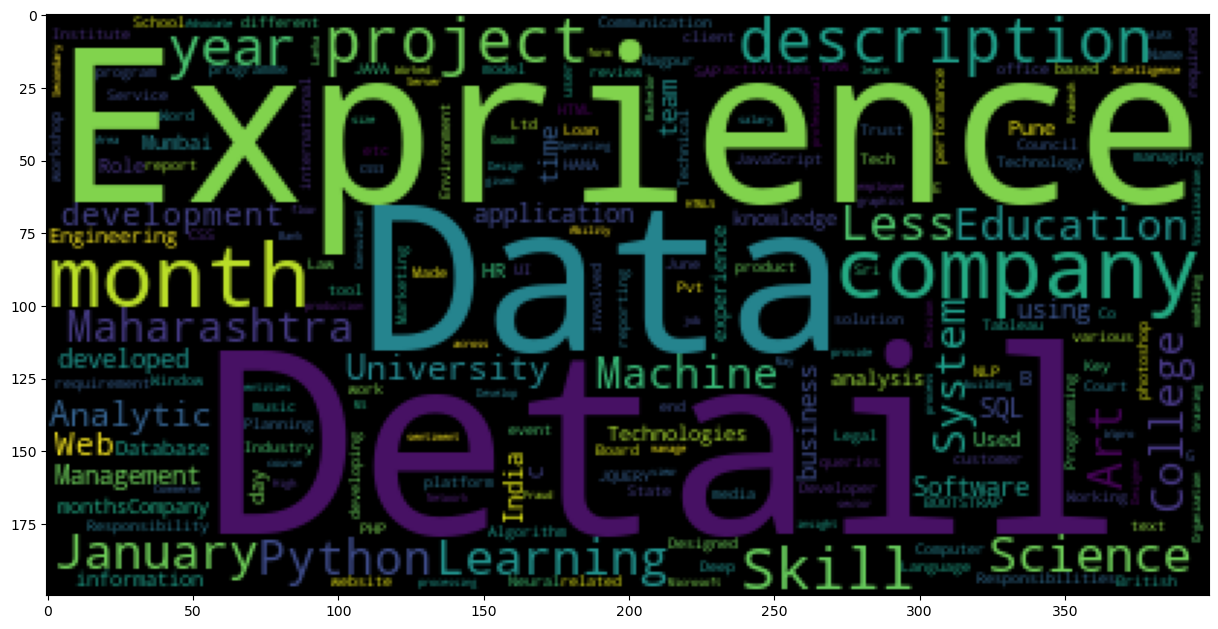

In [18]:
wcl = WordCloud(collocations=False).generate(" ".join(totalWords))
plt.figure(figsize=(15,15))
plt.imshow(wcl)
plt.savefig('images/Nearest_Centroid_wordcloud')

#### TF*IDF Vectorizer

In [20]:
cleaned = X.apply(lambda a: cleanResume(a))


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf = TfidfVectorizer()

In [27]:
X_vect =  tfidf.fit_transform(cleaned)

In [28]:
X_vect.shape

(962, 7569)

### Cross -Validation

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_vect,y,random_state=0)

In [32]:
X_train.shape,X_test.shape

((721, 7569), (241, 7569))

### Building the Model

In [33]:
from sklearn.neighbors import NearestCentroid

In [34]:
clf =NearestCentroid()

In [35]:
clf.fit(X_train,y_train)

NearestCentroid()

In [37]:
y_pred  = clf.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.86      1.00      0.92         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00      1.00      1.00     

In [46]:
f = open("Sample_resume.txt",'r')
sample = f.read()
print(sample)

Tejashree Pishe 
Jr. Machine Learning Engineer. (MITU Research) 
EXPERIENCE 
MITU Research, New Sangavi, Pune 
 Feb 2021 till date 
Hiko Technology Pvt. Ltd., Baner, Pune Full Time Internship 
August 2019 May 2020. 
 
KEY PROJECTS 
Predictive Analytics Implemented for Pistachio Types over quality parameter database
Study the origin, trade business and nutritional values over Pistachio types.
Review the quality of pistachio types over its quality  
pararameters.
Critically evaluate and data preprocessing over the database.
Used the Resampling techniques to work on imbalanced data set.
Identify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis.
Find out the best suitable algorithm with more than 90% accuracy to predict the type of pistachio over new data.
Updating and upgrading the model with non-predictable data.
Technologies: Python for Data Science, NumPY, Panda,
Machine Learning Algorithms 
 
Design and development of Decision 

In [52]:
cleaned_sample = cleanResume(sample)
cleaned_sample

'Tejashree Pishe Jr Machine Learning Engineer MITU Research EXPERIENCE MITU Research New Sangavi Pune Feb 2021 till date Hiko Technology Pvt Ltd Baner Pune Full Time Internship August 2019 May 2020 KEY PROJECTS Predictive Analytics Implemented for Pistachio Types over quality parameter database Study the origin trade business and nutritional values over Pistachio types Review the quality of pistachio types over its quality pararameters Critically evaluate and data preprocessing over the database Used the Resampling techniques to work on imbalanced data set Identify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis Find out the best suitable algorithm with more than 90 a uracy to predict the type of pistachio over new data Updating and upgrading the model with non predictable data Technologies Python for Data Science NumPY Panda Machine Learning Algorithms Design and development of Decision support System for selection of New Resu

In [58]:
clf.predict(tfidf.transform([cleaned_sample]))

array(['Data Science'], dtype=object)